In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [5]:
iris = pd.read_csv("C:\Program Files\csv\iris.csv")
iris

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Toijam Prenita Devi\AppData\Local\Temp\ipykernel_37796\3445941249.py:1: SyntaxWarning: invalid escape sequence '\P'
  iris = pd.read_csv("C:\Program Files\csv\iris.csv")


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
# 1. Feature and target separation
X = iris.drop(columns=['variety'])  # Features (petal/sepal measurements)
y = iris['variety']                # Target (species of iris)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# 3. Model initialization and training
dt_classifier = DecisionTreeClassifier(
    criterion='gini', max_depth=None, random_state=42
)
dt_classifier.fit(X_train, y_train)
# 4. Prediction
y_pred = dt_classifier.predict(X_test)

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Accuracy Score: 1.0


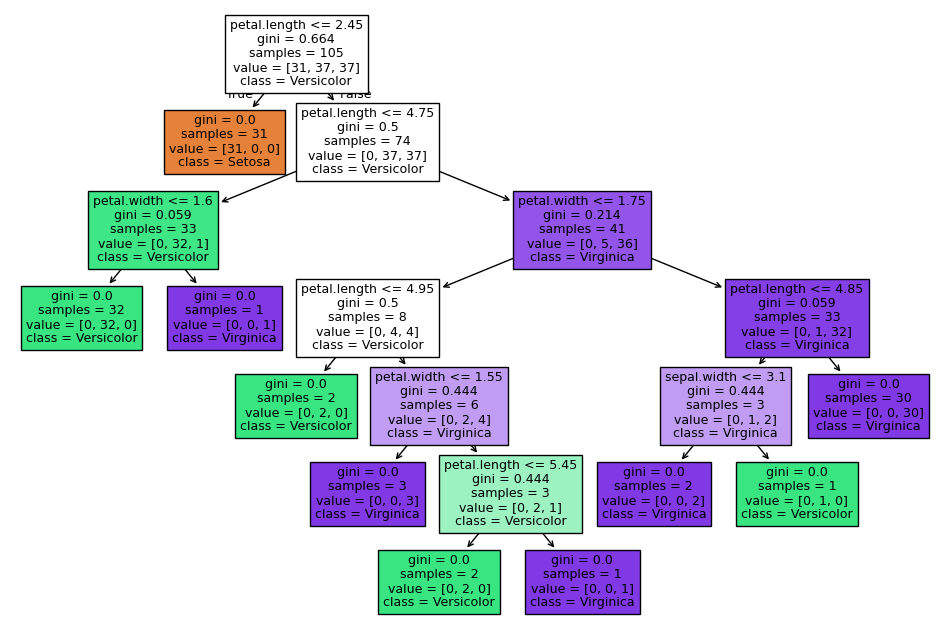

In [16]:
plt.figure(figsize=(12,8))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=[str(label) for label in y.unique()],
    filled=True
)
plt.show()